<a href="https://colab.research.google.com/github/arqMedes/PDS/blob/main/Exerc%C3%ADcios_PDS_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discrete Time


Sendo $x[n]=(\frac{1}{3})^nu[n]$ e $h[n] = (\frac{1}{4})^nu[n+3]$, calcule $y[n]= x[n]*h[n]$

Solução:

Sabe-se que $x[n] \neq 0$, para $n \geq 0$ e, $h[n] \neq 0$, para $n\geq -3$  


Na variável k, tem-se $x[k] \neq 0$, para $k \geq 0$ e, $h[n-k] \neq 0$, para $k \leq n+3$

Então, $y[n] = \sum_{k=-\infty}^{n+3}x[k]h[n-k]=0$, para $n < -3$ e, para $n \geq -3$, tem-se:

$y[n] = \sum_{k=0}^{n+3}(\frac{1}{3})^k(\frac{1}{4})^{n-k}=(\frac{1}{4})^n\sum_{k=0}^{n+3}(\frac{1}{3})^k(\frac{1}{4})^-k$

$y[k] = (\frac{1}{4})^n\sum_{k=0}^{n+3}(\frac{4}{3})^k$

$y[k] = (\frac{1}{4})^n(\frac{(\frac{4}{3})^{n+4}-1}{\frac{4}{3}-1})$

$y[k] = (\frac{1}{4})^n(\frac{(\frac{4}{3})^{n+4}-1}{\frac{1}{3}})$

$y[k] = \frac{\frac{4^4}{3^{n+4}}-(\frac{1}{4})^n}{\frac{1}{3}}$

$y[k] = \frac{4^4}{3^{n+3}}- 3(\frac{1}{4})^n$




# Transformada Z

In [ ]:
### Solving Z domain partial fraction with sympy
from sympy import *
z = symbols('z')

def inverse_z(h):
    '''finds X(z)/z for the inverse z transform table look up
    '''
    h = h/z
    h = apart(h) * z
    return expand(h)


n = z**2 + 7*z + 1
d = z**2  + 2
a = n/d
#
print(apart(a))
a = inverse_z(a)
print(a)
'''
Note, whenever you try to do partial fractions for z inv, you must first divide the system by z
    and then multiply the partial fraction result by z. So you perform partials on X(z)/z = LHS/z, and answer after partial will be multiplied by z so that your final answer is X(z)
'''

(7*z - 1)/(z**2 + 2) + 1
z**2/(2*z**2 + 4) + 14*z/(2*z**2 + 4) + 1/2


'\nNote, whenever you try to do partial fractions for z inv, you must first divide the system by z\n    and then multiply the partial fraction result by z. So you perform partials on X(z)/z = LHS/z, and answer after partial will be multiplied by z so that your final answer is X(z)\n'

In [ ]:
from numpy import *
from scipy.signal import *
num = array([1, 0, 0])
den = array([1, -7/12, 1/12])
[r, p, k] = residuez(num,den)
print(r, p, k)

[-3.  4.] [0.25       0.33333333] []


In [ ]:
2/3

0.6666666666666666

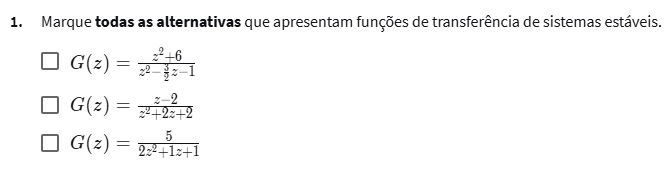

In [ ]:
from numpy import *
from scipy.signal import *
num = array([-.5])
den = array([1, .5, -.5])
[r, p, k] = residue(num,den)
print(r, p, k)

[-0.33333333  0.33333333] [ 0.5 -1. ] []


In [ ]:
import numpy as np
from sympy import *

#init_printing(use_unicode=True)

In [ ]:
z = Symbol('z')
z

z

In [ ]:
numerador =  - 0.5* z
denominador = (z - 0.5)*(z + 1)
H = numerador / denominador
H

-0.5*z/((z - 0.5)*(z + 1))

In [ ]:
apart(H)

-0.333333333333333/(z + 1) - 0.166666666666667/(1.0*z - 0.5)

In [ ]:
# Extraindo numerador e denominador
numerador, denominador = fraction(H)

# Criando polinômios com os coeficientes extraídos
num_pol = Poly(numerador, z)
den_pol = Poly(denominador, z)

# Criando vetores com os coeficientes do polinômio
coeficientes_numerador = np.array(num_pol.all_coeffs())
coeficientes_denominador = np.array(den_pol.all_coeffs())
print(f'Os coeficientes do numerador são {coeficientes_numerador} e do denominador são {coeficientes_denominador}.')

Os coeficientes do numerador são [2 -11 12] e do denominador são [1 -7 18 -20 8].


# Fourier

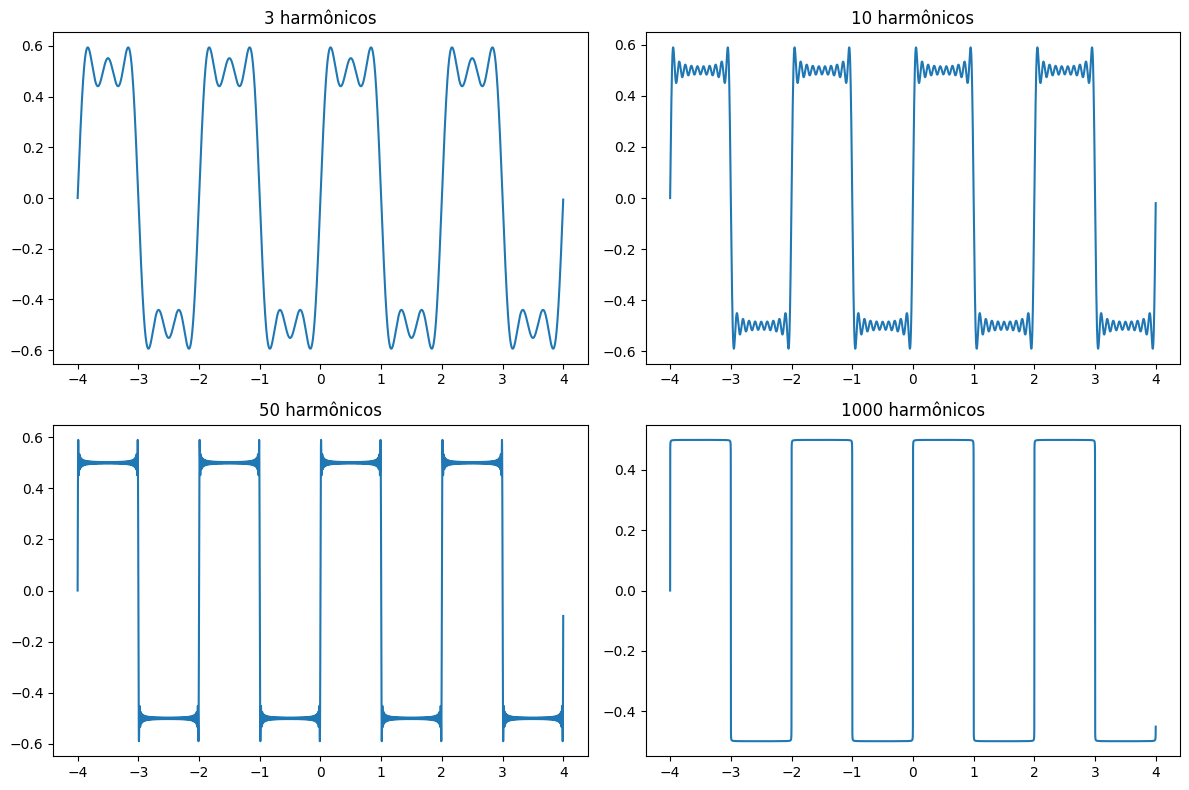

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

t = np.arange(-4, 4, 0.001)

def square_serie(Nh):
    x = np.zeros(t.shape).astype('complex128')

    for k in range(1, (2 * Nh) + 1, 2):
        x += (2 / (1j * k * pi)) * np.exp(1j * k * pi * t)

    return x

plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title('3 harmônicos')
plt.plot(t, np.real(square_serie(3)))
plt.subplot(222)
plt.title('10 harmônicos')
plt.plot(t, np.real(square_serie(10)))
plt.subplot(223)
plt.title('50 harmônicos')
plt.plot(t, np.real(square_serie(50)))
plt.subplot(224)
plt.title('1000 harmônicos')
plt.plot(t, np.real(square_serie(1000)))
plt.tight_layout()

![](https://github.com/arqPy/PDS/blob/main/PDS/img/fourier_serie_discreta_01.png?raw=true)


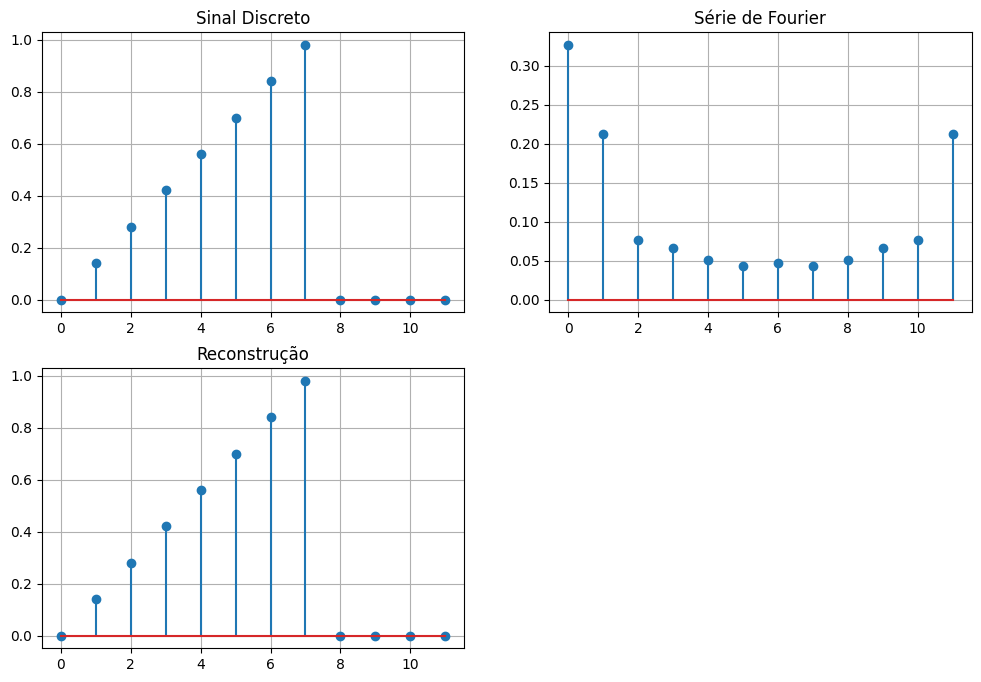

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

n = np.arange(12)
x = np.zeros(n.shape)
y = np.zeros(n.shape).astype('complex128')
xr = np.zeros(n.shape).astype('complex128')

x[1] = 0.14
x[2] = 0.28
x[3] = 0.42
x[4] = 0.56
x[5] = 0.7
x[6] = 0.84
x[7] = 0.98

plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title('Sinal Discreto')
plt.stem(n, x)
plt.grid()

# série de Fourier
N = 12
for k in range(N):
  for m in n:
    y[k] += x[m]*np.exp(-1.j*2*pi/N*k*m)
y = 1/N*y
plt.subplot(222)
plt.title('Série de Fourier')
plt.stem(n, abs(y))
plt.grid()

# Reconstrução
for m in n:
  for k in range(N):
    xr[m] += y[k]*np.exp(1.j*2*pi/N*k*m)
plt.subplot(223)
plt.title('Reconstrução')
plt.stem(n, abs(xr))
plt.grid()

# Transformada Discreta de Fourier


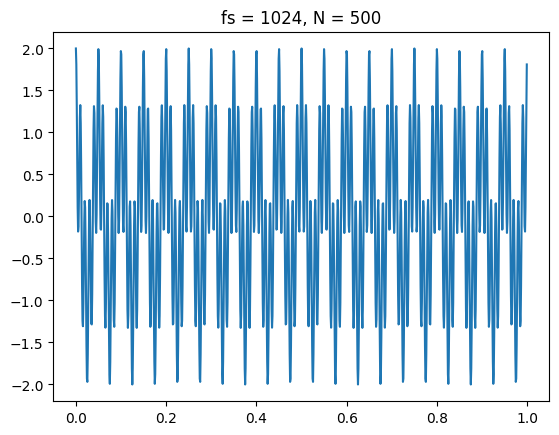

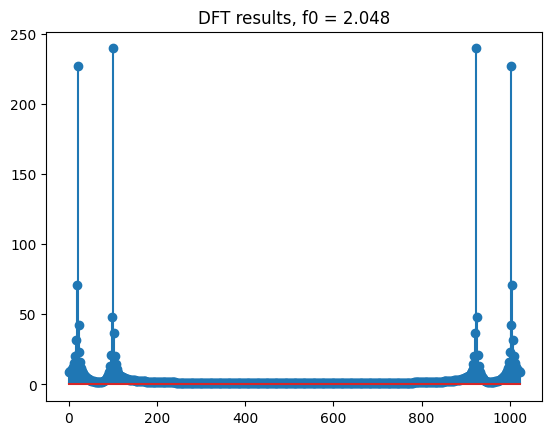

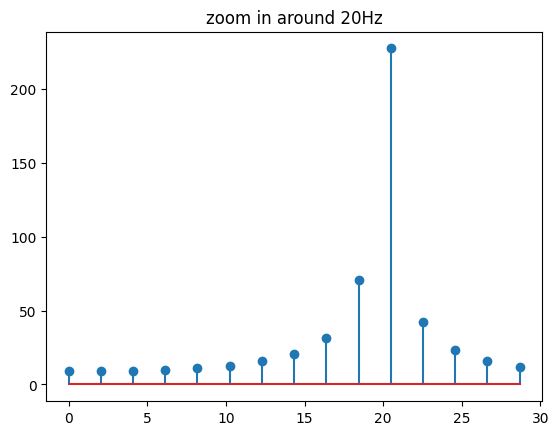

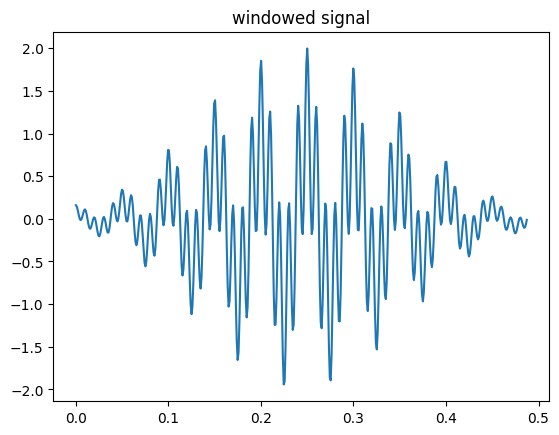

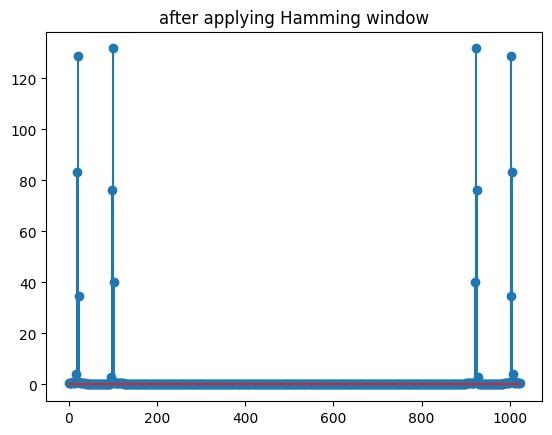

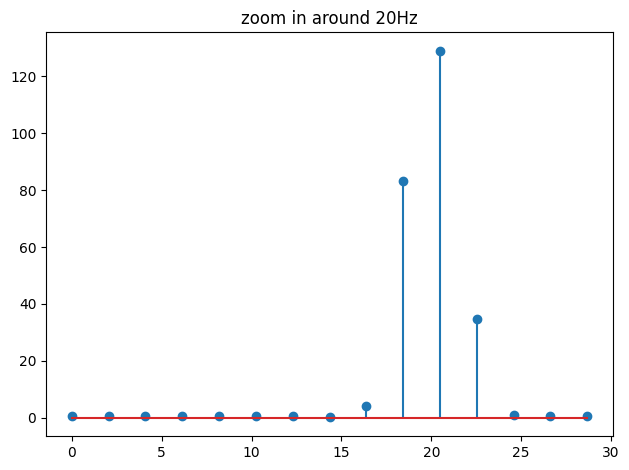

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


fs = 1024
t = np.arange(0, 1, 1/fs)

f1 = 20
f2 = 100
y1 = np.cos(2*np.pi*f1*t)
y2 = np.cos(2*np.pi*f2*t)
y =  y1 + y2

N = 500
f0 = fs/N

yPart = y[0:N]

plt.title("fs = %d, N = %d" % (fs, N))
plt.plot(t, y)

dft = np.fft.fft(yPart)

plt.figure()
plt.title("DFT results, f0 = %.3f" % f0)
n = np.arange(0, N)* f0
plt.stem( n, abs(dft) )

#  zoom in
plt.figure()
plt.title("zoom in around 20Hz")
plt.stem( n[0:15], abs(dft[0:15]) )

##############
#  apply Hamming window
hamming = signal.windows.hamming(len(yPart))
newY = hamming*yPart
plt.figure()
plt.plot(t[0:N], newY)
plt.title("windowed signal")

plt.figure()
dft2 = np.fft.fft(newY)
plt.title("after applying Hamming window")
plt.stem( n, abs(dft2) )

#  zoom in
plt.figure()
plt.title("zoom in around 20Hz")
plt.stem( n[0:15], abs(dft2[0:15]) )
#use_line_collection = True
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
x = [1, -1, 1, -1]
X = np.fft.fft(x)
print(X)

X = []
N = 4
w0 = np.pi*2/N

for k in range(N):
  e = 0
  for n in range(N):
    e += x[n]*np.exp(-1.0j*w0*k*n)
  if abs(e) < 1e-15:
    e = 0
  X.append(e.real)
print(X)




[0.+0.j 0.+0.j 4.+0.j 0.+0.j]
[0, 0, 4.0, 0]


In [ ]:
import numpy as np
x = [1, 2, 3, 4]


X = []
N = 4
w0 = np.pi*2/N

for k in range(N):
  e = 0
  for n in range(N):
    e += x[n]*np.exp(-1.0j*w0*k*n)
  if abs(e) < 1e-15:
    e = 0

  X.append(e)
print(X)

X = np.fft.fft(x)
print(X)

[(10+0j), (-2.0000000000000004+1.9999999999999996j), (-2-9.797174393178826e-16j), (-1.9999999999999982-2.000000000000001j)]
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]


In [ ]:
import numpy as np
x = [1, 2, 1, 2]


X = []
N = 4
w0 = np.pi*2/N
W_N = np.exp(-1.0j*w0)

for k in range(N):
  e = 0
  for n in range(N):
    e += x[n]*W_N**(k*n)
  if abs(e) < 1e-15:
    e = 0

  X.append(abs(e) )
print(X)

X = np.fft.fft(x)
print(X)

[6.0, 0, 2.0, 0]
[ 6.+0.j  0.+0.j -2.+0.j  0.+0.j]


In [ ]:
X= [6, 0, -2, 0]
x = np.fft.ifft(X)
print(x)

[1.+0.j 2.+0.j 1.+0.j 2.+0.j]


In [ ]:
x = []
N = 4
w0 = np.pi*2/N

for n in range(N):
  e = 0
  for k in range(N):
    e += X[k]*np.exp(1.0j*w0*k*n)
  if abs(e) < 1e-15:
    e = 0

  x.append(e/N)
print(x)

x = np.fft.ifft(X)
print(x)

[(1+0j), (-1+1.2246467991473532e-16j), (1-2.4492935982947064e-16j), (-1+3.6739403974420594e-16j)]
[ 1.+0.j -1.+0.j  1.+0.j -1.+0.j]


In [1]:
import numpy as np
x= [2, 0, -2,0]
X = np.fft.fft(x)
X

array([0.+0.j, 4.+0.j, 0.+0.j, 4.+0.j])

Considere x[n] representado na Figura 1 que pode ser expresso em termos de uma série de Fourier de tempo discreto como


!['Figura 1'](https://github.com/arqMedes/images/blob/main/sinal_discreto_01.jpg?raw=true)

*Solução*

$x[n] = \sum_{k=<4>}a_ke^{jw_0kn}$ ou

$x[n] = \sum_{k=<4>}a_kW_4^{nk}n$ onde $W_4=j$


$$
\begin{array}{|c|c|} \hline
1 & j & -1 & -j \\ \hline
W_4^0 & W_4^1 & W_4^2 & W_4^3 \\
W_4^4 & W_4^5 & W_4^6 & W_4^7  \\
W_4^8 & W_4^9 & W_4^{10} & W_4^{11}  \\ \hline
\end{array}
$$

E de acordo com o gráfico,

$x[0] = a_0 + a_1 +a_2+a_3 = 1$

$x[1] = a_0 + a_1W_4^1 +a_2W_4^2+a_3W_4^3 = 0$

$x[2] = a_0 + a_1W_4^2 +a_2W_4^4+a_3W_4^6 = 2$

$x[3] = a_0 + a_1W_4^3 +a_2W_4^6+a_3W_4^9 = -1$

Assim,

$x[0] = a_0 + a_1 +a_2+a_3 = 1$

$x[1] = a_0 + ja_1 -a_2 -ja_3 = 0$

$x[2] = a_0 - a_1 +a_2-a_3 = 2$

$x[3] = a_0 - ja_1 -a_2+ ja_3 = -1$

Resolvendo o sistema de equanções determina-se:

$a_0= \frac{1}{2}, \ a_1= -\frac{1}{4} - j\frac{1}{4}, \ a_2= 1 \ e \ a_3= -\frac{1}{4} + j\frac{1}{4}$

Outra maneira, usando a fórmula:

$X[k] = \frac{1}{4}\sum_{n=<4>}x[n]W_4^{-nk}n$

In [1]:
import numpy as np
A = np.matrix([[1, 1, 1, 1],[1, 1j, -1, -1j], [1, -1, 1, -1], [1, -1j, -1, 1j]])
B= np.matrix([1,0,2,-1]).T
#print(A, B)
print(A.I*B)

[[ 0.5 +0.j  ]
 [-0.25-0.25j]
 [ 1.  +0.j  ]
 [-0.25+0.25j]]


# **links**

https://cpjobling.github.io/eg-247-textbook/dt_systems/3/i_z_transform.html

https://www.walissonsilva.com/posts/serie-de-fourier-de-uma-onda-quadrada-em-python